# Predict the Risk of Diabetes
#### Background
This is an entry to a competition by [DataCamp](https://app.datacamp.com/) that is not judged. The challenge is to develop a predictive model for effectively detecting potential cases of diabetes. The model has to be applied to predict the risk of diabetes for a person with certain traits. The data is imbalanced and contains a lot of missing values which affects the methodology I use.

#### Data
The dataset contains diagnostic measurements that are associated with diabetes. It includes Pregnancies (Number of times the patient has been pregnant), Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test), BloodPressure (Diastolic blood pressure (mm Hg)), SkinThickness (Triceps skinfold thickness (mm)), Insulin (2-Hour serum insulin (mu U/ml)), BMI (Body mass index (weight in kg/(height in m)^2)), DiabetesPedigreeFunction (A function that represents the likelihood of diabetes based on family history), Outcome (whether the person is diagnosed with diabetes). The data was collected from a population of Pima Indian women and contains 768 rows.

#### Clean and Validate Data
I clean and validate the data by looking at missing values, duplicates, data types, unique values, ranges, frequencies are descriptive statistics. The major finding is that the columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' have 0 in their ranges which isn't expected. I address this issue in the sections on Exploratory Data Analysis and Feature Engineering. I ensure 'Outcome' is treated as a categorical variable with values of 0 or 1.

#### Exploratory Data Analysis
The data is unbalanced since most of the entries (500 out of 768) have 'Outcome' of 0. I generate pairplots and histograms colored according to 'Outcome' which show that there seems to be positive correlation between high glucose levels and diabetes outcome. Furthermore, there appear to be positive correlations between 'Glucose' and 'Insulin', 'BMI' and 'SkinThickness', and 'Pregnancies' and 'Age'. Many other weak correlations appear to exist between the variables. I explore this further in the section on Feature Engineering. 

#### Feature Engineering
Since there are some unexpected zero values I remove the respective rows in the columns 'Glucose', 'BloodPressure' and 'BMI' which have between 0.6% - 4.5% missing data. In 'SkinThickness' and 'Insulin' where the missing data is 29.5% and 48.9% respectively I impute the data. Since the data has a lot of outliers and is skewed, I decide to impute using the median which I calculate separately for different values of 'Outcome'. I scale the final features ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age') using StandardScaler. I use a heatmap to illustrate the correlations between the variables in the processed data which are similar to the correlations found during the Exploratory Data Analysis.

#### Model Creation and Evaluation
Since the target variable 'Outcome' has only two possible values (0 and 1) this is a classification problem. 
The types of classification models I choose are:
- Random Forest Classifier: This ensemble method requires very little preprocessing. Thus, I train this model on the raw data and use it as a starting point in the analysis.
- Additional classification models: K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, and Gradient Boost are all compared with the Random Forest. I train these models on the data that I processed using feature engineering and compare their performance.

Since the data is imbalanced I perform train/test split of the data with stratified sampling. Then, I train a base Random Forest Classifier on the raw data and the selected models on the pre-processed data. Finally, I apply GridSearchCV to fine-tune the parameters of the model that performs best on the pre-processed data. The Random Forest Classifier performs best in terms of the selected metrics: accuracy, precision, recall, and F1 score. It has accuracy score of 0.88 compared to the base model which has 0.76. 'Insulin' is the most important feature in the final model. 

#### Estimate the Risk of Diabetes for a Specific Person
The instructions in the challenge ask me to calculate the risk of diabetes for a person with the following traits: age 54, length 178 cm, weight 96 kg, and Glucose levels of 125 mg/dL. Since the instructions provide only limited information for that specific person, I enter the rest of the traits as missing values. The Random Forest Classifier trained on raw data predicts that there is 52% probability that the person with the provided traits has diabetes. The final Random Forest Classifier makes the same prediction but with 68% probability.

## Data

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

- Pregnancies
Type: Numerical (Continuous)
Description: Number of times the patient has been pregnant.

- Glucose
Type: Numerical (Continuous)
Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure
Type: Numerical (Continuous)
Description: Diastolic blood pressure (mm Hg).

- SkinThickness
Type: Numerical (Continuous)
Description: Triceps skinfold thickness (mm).

- Insulin
Type: Numerical (Continuous)
Description: 2-Hour serum insulin (mu U/ml).

- BMI
Type: Numerical (Continuous)
Description: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction
Type: Numerical (Continuous)
Description: A function that represents the likelihood of diabetes based on family history.

- Age
Type: Numerical (Continuous)
Description: Age of the patient in years.

- Outcome
Type: Categorical (Binary)
Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

In [1]:
# Import statements
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
import graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore') # added after I finalized the project

In [2]:
# Load data
data = pd.read_csv('data/diabetes.csv')

# Display the first five rows of the dataframe
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Clean and Validate Data
The dataframe has 9 columns and 768 rows. I start cleaning and validating the data by looking at:
- Missing values: There are no missing values in any of the dataframes so I don't make any changes.
- Duplicates: There are no duplicates in any of the dataframes so I don't make any changes.
- Data types: I ensure 'Outcome' is treated as a categorical variable and I see no need to change the data types of the other variables.
- Unique values: Almost all columns represent numeric data and have a reasonable amount of unique values. The only categorical variable is the target variable 'Outcome'. It has two unique values which is expected.
- Ranges: Most of the columns have 0 in their ranges which isn't expected for 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'. I will explore this issue in the Exploratory Data Analysis section.
- Frequencies: I look at each of the variables using .value_counts() which is not shown here for brevity. Again, I note the need to further explore the values of 0 in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'.
- Descriptive statistics: I investigate the descriptive statistics for the dataframe and I will later look at it in detail in the Exploratory Data Analysis.

In [3]:
# Check for missing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Check for duplicates
data.duplicated().sum()

0

In [5]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Print the number of unique values and range (if relevant) in each column
print('The dataframe has', data.shape[1], 'columns and', data.shape[0], 'rows.')
print('The number of unique values and range (if relevant) in each column is:')
print('Pregnancies:', data['Pregnancies'].nunique(), 'unique values and range is', data['Pregnancies'].min(), 'to', data['Pregnancies'].max())
print('Glucose:', data['Glucose'].nunique(), 'unique values and range is', data['Glucose'].min(), 'to', data['Glucose'].max())
print('BloodPressure:', data['BloodPressure'].nunique(), 'unique values and range is', data['BloodPressure'].min(), 'to', data['BloodPressure'].max())
print('SkinThickness:', data['SkinThickness'].nunique(), 'unique values and range is', data['SkinThickness'].min(), 'to', data['SkinThickness'].max())
print('Insulin:', data['Insulin'].nunique(), 'unique values and range is', data['Insulin'].min(), 'to', data['Insulin'].max())
print('BMI:', data['BMI'].nunique(), 'unique values and range is', data['BMI'].min(), 'to', data['BMI'].max())
print('DiabetesPedigreeFunction:', data['DiabetesPedigreeFunction'].nunique(), 'unique values and range is', data['DiabetesPedigreeFunction'].min(), 'to', data['DiabetesPedigreeFunction'].max())
print('Age:', data['Age'].nunique(), 'unique values and range is', data['Age'].min(), 'to', data['Age'].max())
print('Outcome:', data['Outcome'].nunique(), 'unique values.')

The dataframe has 9 columns and 768 rows.
The number of unique values and range (if relevant) in each column is:
Pregnancies: 17 unique values and range is 0 to 17
Glucose: 136 unique values and range is 0 to 199
BloodPressure: 47 unique values and range is 0 to 122
SkinThickness: 51 unique values and range is 0 to 99
Insulin: 186 unique values and range is 0 to 846
BMI: 248 unique values and range is 0.0 to 67.1
DiabetesPedigreeFunction: 517 unique values and range is 0.078 to 2.42
Age: 52 unique values and range is 21 to 81
Outcome: 2 unique values.


In [7]:
# Print descriptive statistics for the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


I use .value_counts() to explore the values of 0 in the columns where such values are not expected. Here are the number of values found:
- 'Glucose': 5 values
- 'BloodPressure': 35 values
- 'SkinThickness': 227 values
- 'Insulin': 374 values
- 'BMI': 11 values

The data reflects an inaccurate scenario since the zero values are incorrect and will probably lead to wrong predictions. I will address this issue in the section on Feature Engineering.

In [8]:
# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

## Exploratory Data Analysis

When I group the data according to 'Outcome', it is clear that the data is not balanced: there are 500 entries with 'Outcome' of 0 and 268 with 'Outcome' of 1. I generate pairplots and histograms colored according to 'Outcome' which show that
- There seems to be correlation between high glucose levels and diabetes outcome. I illustrate this also using a boxplot which shows that the median for 'Glucose' is higher for individual with diabetes.
- There appears to be a positive correlation between 'Glucose' and 'Insulin'
- There appear to be many weak correlations between the variables. I explore this further in the section on Feature Engineering.

Finally, I generate scatterplots of 'BMI' vs 'Glucose' and 'Age' colored by 'Outcome'. The first plot shows that higher values of glucose seem to be correlated with a positive outcome for diabetes. There is a spread of the values for BMI. The second scatterplot of 'BMI' and 'Age' is also colored by 'Outcome'. It shows some clusters but there appears to be some correlation of both 'BMI' and 'Age' with a positive outcome for diabetes.

In [9]:
# Group the data according to 'Outcome'
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

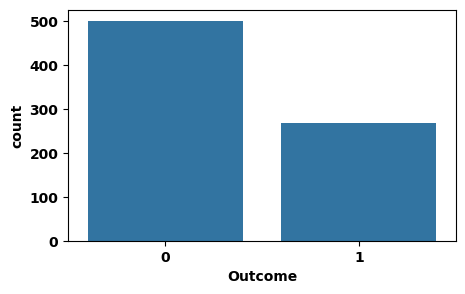

In [10]:
# Countplot of target variable
plt.figure(figsize=(5,3))
sns.countplot(data, x = 'Outcome')

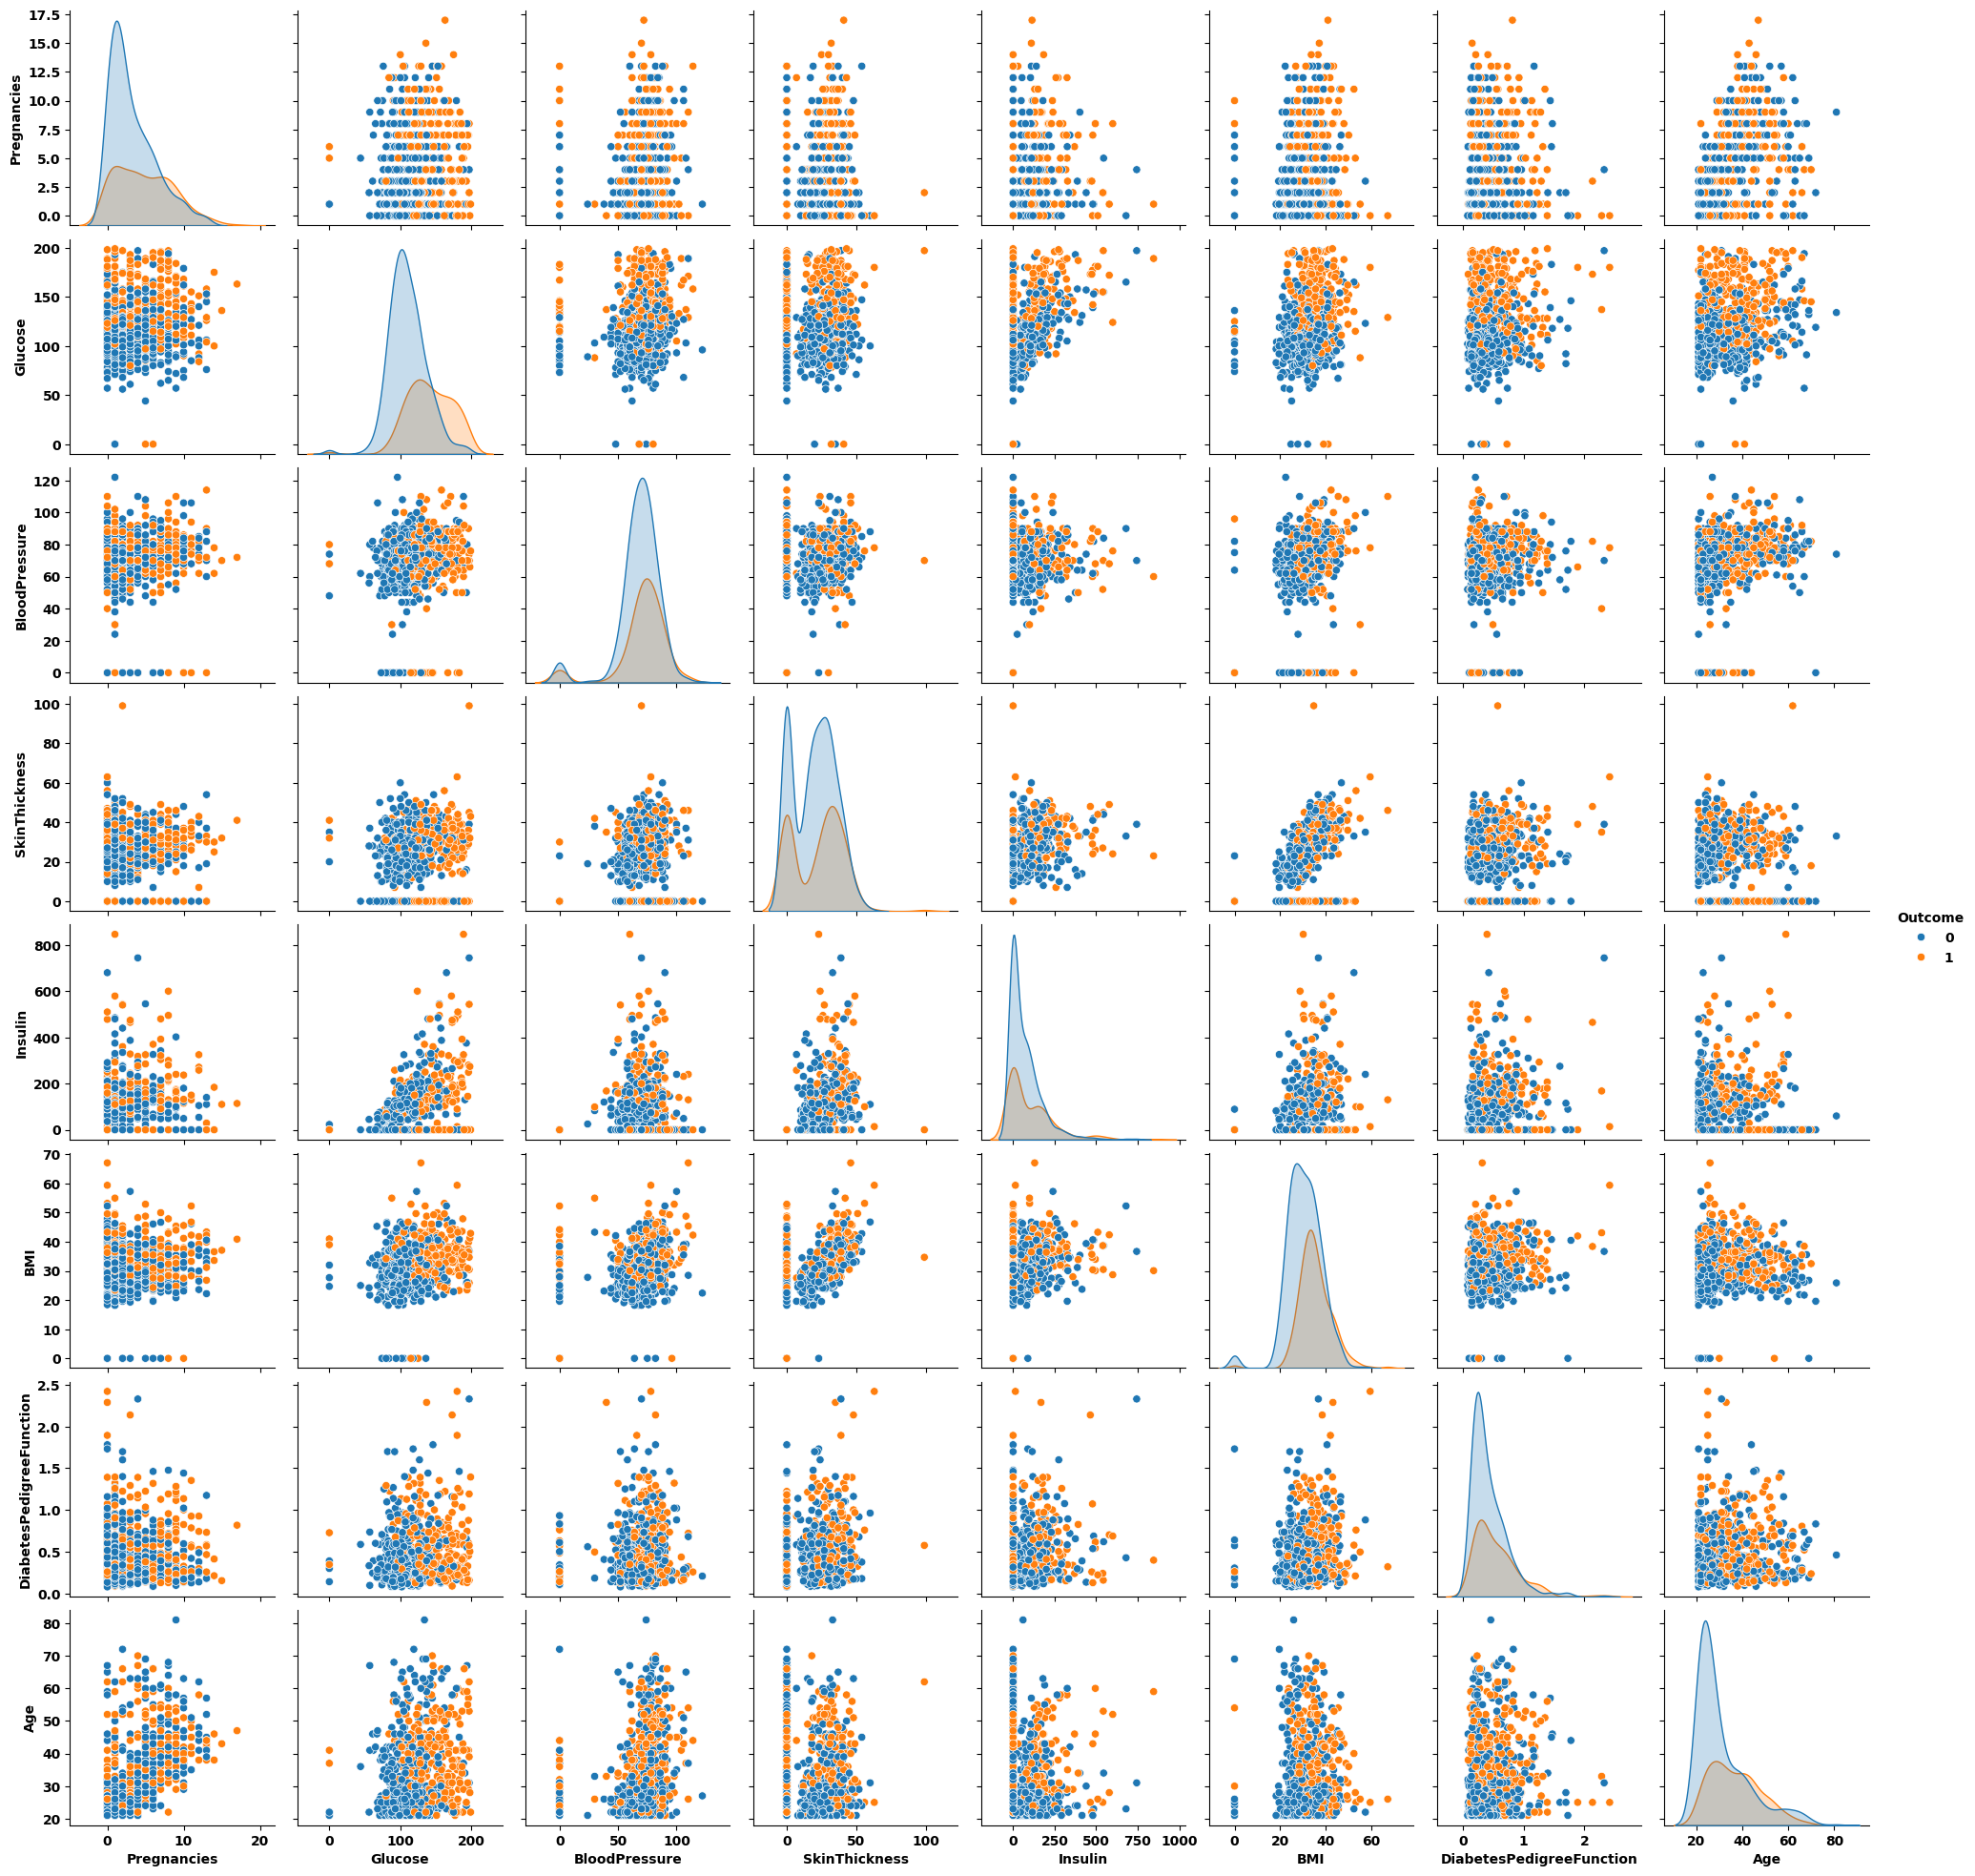

In [11]:
# Pairplots of potential features
sns.pairplot(data, hue = 'Outcome')

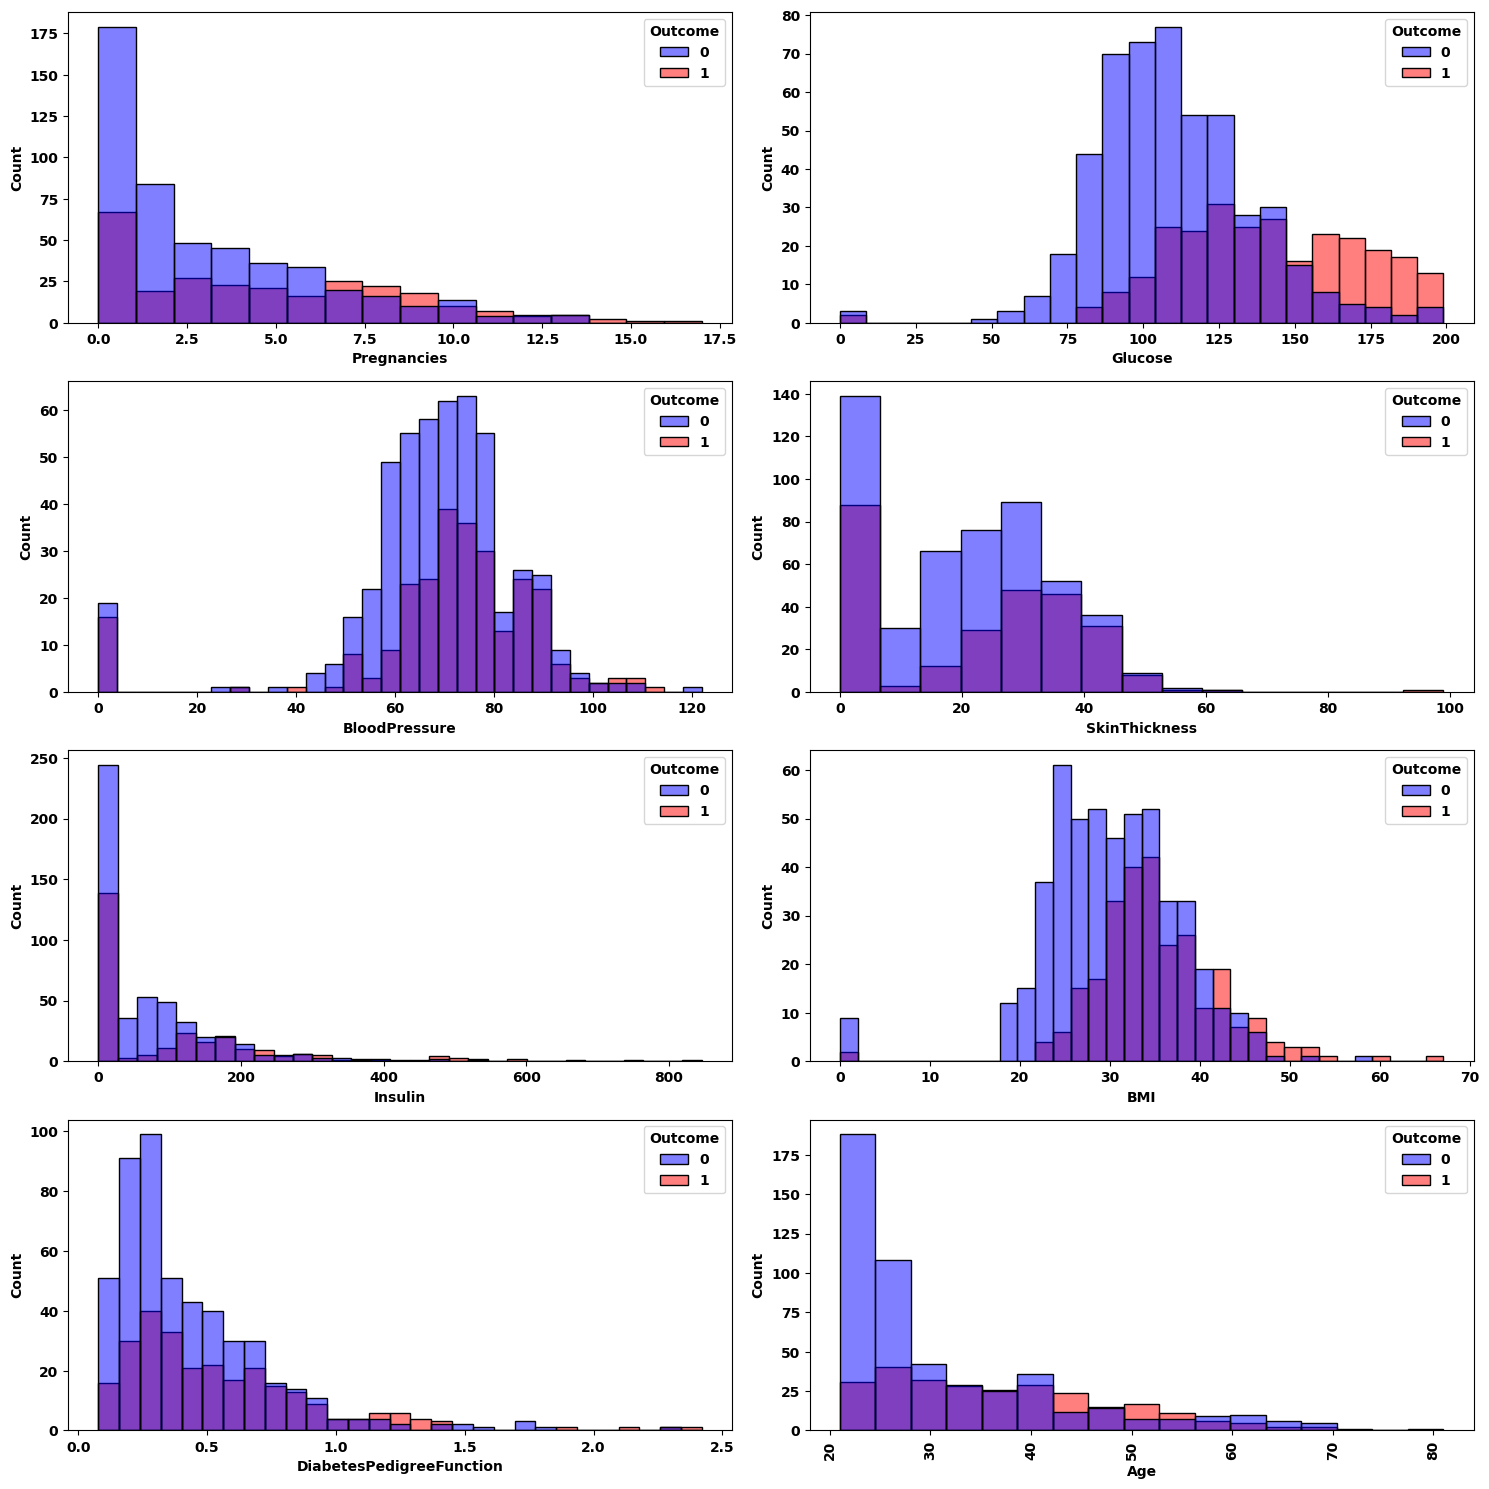

In [12]:
# Set the size of the graph
fig = plt.figure(figsize = (15, 15))

# Set the axis of the graph
ax = [None for i in range(8)]

# Hist plots
ax[0] = plt.subplot2grid((4, 2), (0, 0), colspan=1)
sns.histplot(data, x='Pregnancies', ax=ax[0], hue='Outcome', palette=['blue', 'red'])

ax[1] = plt.subplot2grid((4,2), (0, 1), colspan = 1)
sns.histplot(data, x='Glucose', ax=ax[1], hue='Outcome', palette=['blue', 'red'])

ax[2] = plt.subplot2grid((4, 2), (1, 0), colspan=1)
sns.histplot(data, x='BloodPressure', ax=ax[2], hue='Outcome', palette=['blue', 'red'])

ax[3] = plt.subplot2grid((4, 2), (1, 1), colspan=1)
sns.histplot(data, x='SkinThickness', ax=ax[3], hue='Outcome', palette=['blue', 'red'])

ax[4] = plt.subplot2grid((4, 2), (2, 0), colspan=1)
sns.histplot(data, x='Insulin', ax=ax[4], hue='Outcome', palette=['blue', 'red'])

ax[5] = plt.subplot2grid((4, 2), (2, 1), colspan=1)
sns.histplot(data, x='BMI', ax=ax[5], hue='Outcome', palette=['blue', 'red'])

ax[6] = plt.subplot2grid((4, 2), (3, 0), colspan=1)
sns.histplot(data, x='DiabetesPedigreeFunction', ax=ax[6], hue='Outcome', palette=['blue', 'red'])

ax[5] = plt.subplot2grid((4, 2), (3, 1), colspan=1)
sns.histplot(data, x='Age', ax=ax[7], hue='Outcome', palette=['blue', 'red'])
plt.xticks(rotation = 90)

plt.tight_layout()

Text(0, 0.5, 'Glucose Level (mg/dL)')

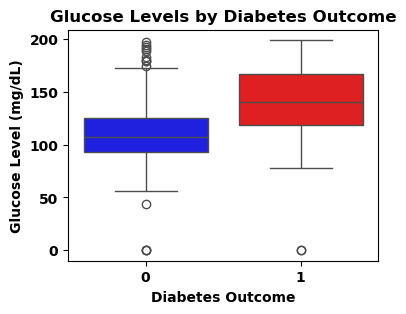

In [13]:
# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(4, 3))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=['blue', 'red'])
plt.title('Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Level (mg/dL)')

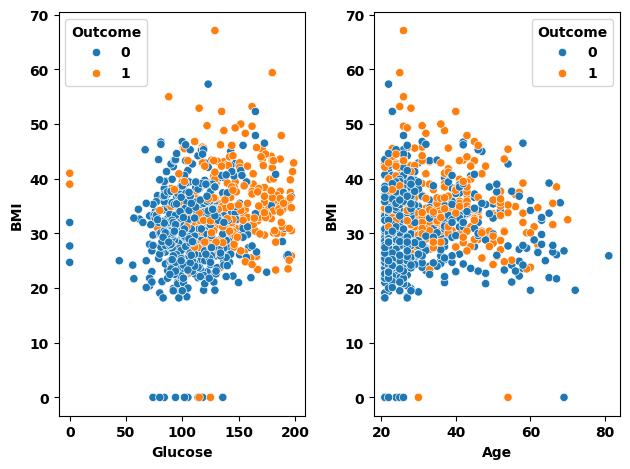

In [14]:
# Plot scatterplots of 'BMI' vs 'Glucose' and 'Age' colored by 'Outcome'
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Glucose', y = 'BMI', data = data, hue = 'Outcome')

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Age', y = 'BMI', data = data, hue = 'Outcome')
plt.tight_layout()

## Feature Engineering
Here are the techniques that I consider to address the issue of unexpected zero values:
- Remove rows: This is the best option for 'Glucose', 'BloodPressure' and 'BMI' which contain relatively small amounts of missing data (0.6% - 4.5% missing data). However, this is not a good option for 'SkinThickness' and 'Insulin' where the missing data is 29.5% and 48.9% respectively.
- Don't use the respective features: This decision is suitable when there is a lot of missing or invalid data. I investigate the data by excluding the rows with entries of 0 and group the data according to 'Outcome'. I find that the medians for both 'SkinThickness' and 'Insulin' are different for each 'Outcome'. Thus, the features seem to be important for the model, so I decide to keep them.
- Impute data: This is the option I choose for 'SkinThickness' and 'Insulin'. Since the data has a lot of outliers and is also skewed, I decide to use the median for the imputation.

I apply StandardScaler to the data and then plot a heatmap. The notable findings are:
- Moderate correlation (0.40-0.59) for (1) 'Insulin' and 'Glucose', (2) 'BMI' and 'SkinThickness', (3) 'Pregnancies' and 'Age', and (4) 'Glucose' and 'Outcome'.
- Weak correlation (0.20-0.39) with the target variable 'Outcome' for 'Insulin', 'BMI', 'SkinThickness', 'Age' and 'Pregnancies'. 

In [15]:
# Remove rows where 'Glucose', 'BloodPressure' or 'BMI' are 0
data = data[(data['Glucose']!=0) & (data['BloodPressure']!=0) & (data['BMI']!=0)]

In [16]:
# Find the median for 'Insulin' for different values of 'Outcome'
data_insulin = data[data['Insulin']!=0]
data_insulin.groupby('Outcome')['Insulin'].median()

Outcome
0    105.0
1    169.5
Name: Insulin, dtype: float64

In [17]:
# Find the median for 'Insulin' for different values of 'SkinThickness'
data_skin_thickness = data[data['SkinThickness']!=0]
data_skin_thickness.groupby('Outcome')['SkinThickness'].median()

Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64

In [18]:
# Impute the data in 'Insulin' and 'SkinThickness' using the median
data.loc[(data['Outcome'] == 0) & (data['Insulin'] == 0), 'Insulin'] = 105
data.loc[(data['Outcome'] == 1) & (data['Insulin'] == 0), 'Insulin'] = 170

data.loc[(data['Outcome'] == 0) & (data['SkinThickness'] == 0), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1) & (data['SkinThickness'] == 0), 'SkinThickness'] = 32

In [19]:
# Select the features
X = data.drop('Outcome', axis = 1)
features = X.columns

# Select the target variable
y = data['Outcome']

In [20]:
# Scale the features using StandardScaler
X = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Correlation heatmap of numeric variables and target variable')

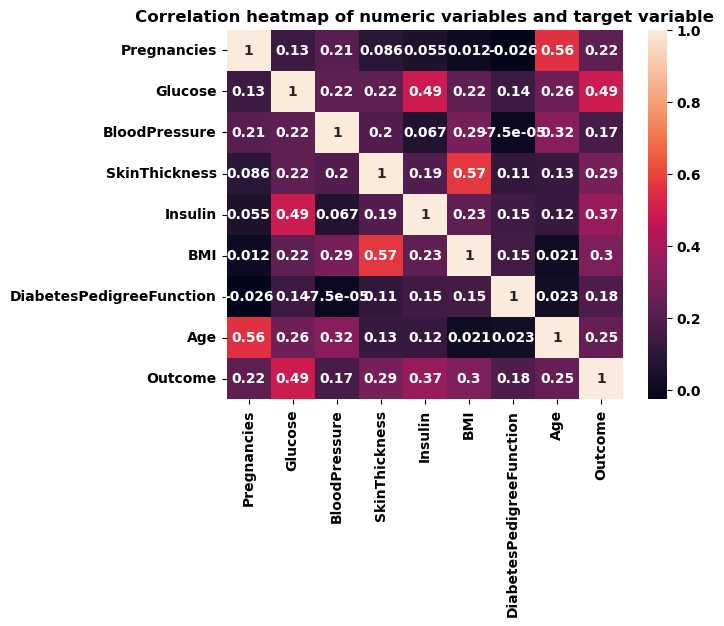

In [21]:
# Select the numeric features and the target variable 'Outcome'
columns = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

# Display the correlation of the numeric features and the target variable 'Outcome'
sns.heatmap(columns.corr(), annot=True)
plt.title('Correlation heatmap of numeric variables and target variable')

## Model Creation and Evaluation
The goal of the project is to build a model to determine the most important factors affecting the diabetes outcome. Since the target variable 'Outcome' has only two possible values (0 and 1) this is a classification problem. 

The types of classification models I choose are:
- Random Forest Classifier: This ensemble method is suitable for supervised machine learning. It does not need variables to be normalized so there is very little preprocessing necessary. Thus, I will train this model on the raw data and use it as a starting point in the analysis.
- Additional classification models: K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, and Gradient Boost are all compared with the Random Forest. I train these models on the data that I processed using feature engineering.

Methodology:
- Train/Test split of the data: Since the data is imbalanced, i.e. there is a large imbalance in the distribution of the target classes, I use stratified sampling. Thus, each response class should be represented with equal proportions.
- Train a base Random Forest Classifier on the raw data.
- Train various classification models on the pre-processed data.
- Apply GridSearchCV to fine-tune the parameters of the model that performs best on the pre-processed data (in this case the Random Forest Classifier).

I evaluate the performance of the models using:
- Accuracy: Main metric; however, the dataset is not balanced which will cause the model to achieve a higher accuracy rate as it will predict the majority class. Therefore, it is important to also look at additional metrics.
- Precision, recall, and F1 score: Additional metrics for evaluating the models.

#### Random Forest Classifier on Raw Data

In [22]:
# Load the raw data
raw_data = pd.read_csv('data/diabetes.csv')

# Select the features
X0 = raw_data[features]

# Select the target variable
y0 = raw_data['Outcome']

# Split the data into train and test data
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, stratify = raw_data['Outcome'], test_size = 0.2, random_state = 42)

In [23]:
# Create model
rf0 = RandomForestClassifier(random_state=42)

# Fit model
rf0.fit(X_train0, y_train0)

# Make predictions on test data
y_pred_rf0 = rf0.predict(X_test0)

In [24]:
# Calculate metrics to evaluate the model
accuracy_rf0 = round(accuracy_score(y_test0, y_pred_rf0),2)
precision_rf0 = round(precision_score(y_test0, y_pred_rf0),2)
recall_rf0 = round(recall_score(y_test0, y_pred_rf0),2)
f1_rf0 = round(f1_score(y_test0, y_pred_rf0),2)

# Print the scores of the model
score_models = pd.DataFrame([['Random Forest Classifier (raw data)', accuracy_rf0, precision_rf0, recall_rf0, f1_rf0]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
score_models

,Model,Accuracy,Precision,Recall,F1
0,Random Forest Classifier (raw data),0.76,0.68,0.59,0.63


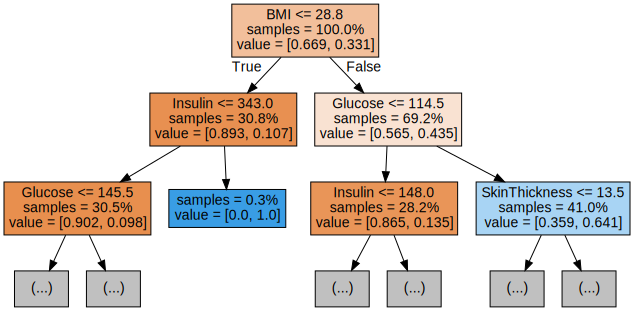

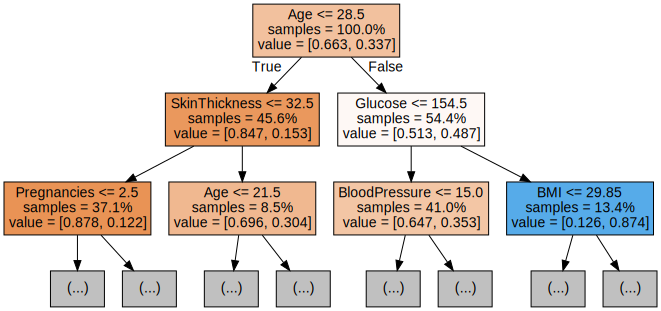

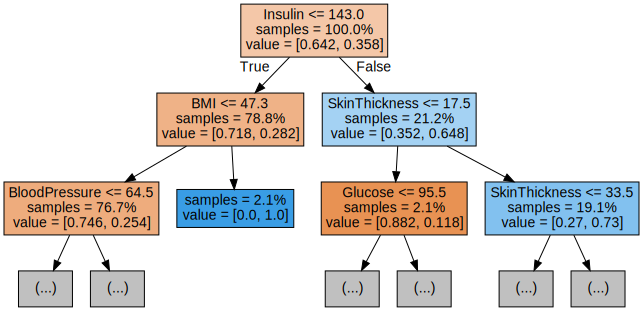

In [25]:
# Export the first three decision trees from the forest
for i in range(3):
    tree = rf0.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train0.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [26]:
# Extract feature importance
feature_importance = rf0.feature_importances_

# Create a dataframe for the feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by = 'Importance', ascending = False)

# Select the top 3 features
top_3_features = feature_importance_df['Feature'].values[:3]

Text(0.5, 1.0, 'Feature Importance in Predicting Diabetes Outcome')

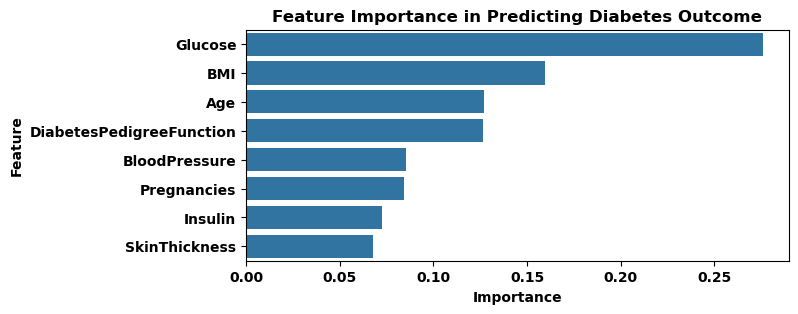

In [27]:
# Plot the feature importance in the random forest
plt.figure(figsize = (7, 3))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df)
plt.title('Feature Importance in Predicting Diabetes Outcome')

#### Additional Classification Models Applied on Pre-Processed Data
The random forest model trained on the raw data achieved accuracy score of 0.76 but performed worse in terms of other metrics. I train other models on the pre-processed data to compare their performance:
- Compare the performance of seven classifiers: Random Forest, Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, Gaussian Naive Bayes, and Gradient Boost. The Random Forest Classifier still performs the best overall. The feature importance in this model is quite different compared to the base model. 'Insulin' is now the most important feature. The difference is largely due to the preprocessing of the data since I imputed a lot of zero values for 'Insulin' with the median.
- Apply GridSearchCV: Since the dataset is quite small, this method for hyperparameter tuning is feasible. Still, it is computationally expensive and it doesn't improve the accuracy of the model significantly as it increases the accuracy score only by 0.01 (from 0.87 to 0.88).

In [28]:
# Split the pre-processed data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data['Outcome'], test_size = 0.2, random_state = 42)

In [29]:
# Initialize the models with their default parameters and add them to a list
models = [('Random Forest Classifier', RandomForestClassifier(random_state=42)),
          ('Logistic Regression', LogisticRegression(random_state=42)),
          ('K Neighbors Classifier', KNeighborsClassifier()),
          ('Support Vector Classification', SVC(random_state=42)),
          ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
          ('Gaussian Naive Bayes', GaussianNB()),
          ('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42))]

In [30]:
# Create a loop to fit each model and calculate the respective scores
names = []
accuracy = []
precision = []
recall = []
f1 = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),2))
    precision.append(round(precision_score(y_test, y_pred),2))
    recall.append(round(recall_score(y_test, y_pred),2))
    f1.append(round(f1_score(y_test, y_pred),2))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})
print(tr_split)

                            Name  Accuracy  Precision  Recall    F1
0       Random Forest Classifier      0.87       0.78    0.86  0.82
1            Logistic Regression      0.72       0.60    0.60  0.60
2         K Neighbors Classifier      0.77       0.68    0.64  0.66
3  Support Vector Classification      0.83       0.74    0.78  0.76
4       Decision Tree Classifier      0.86       0.78    0.80  0.79
5           Gaussian Naive Bayes      0.68       0.54    0.60  0.57
6   Gradient Boosting Classifier      0.87       0.80    0.82  0.81


In [31]:
# Select the best performing model overall - Random Forest Classifier
rf1 = models[0][1]

# Extract feature importance
feature_importance = rf1.feature_importances_

# Create a dataframe for the feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by = 'Importance', ascending = False)

# Select top 3 features
top_3_features = feature_importance_df['Feature'].values[:3]

Text(0.5, 1.0, 'Feature Importance in Predicting Diabetes Outcome')

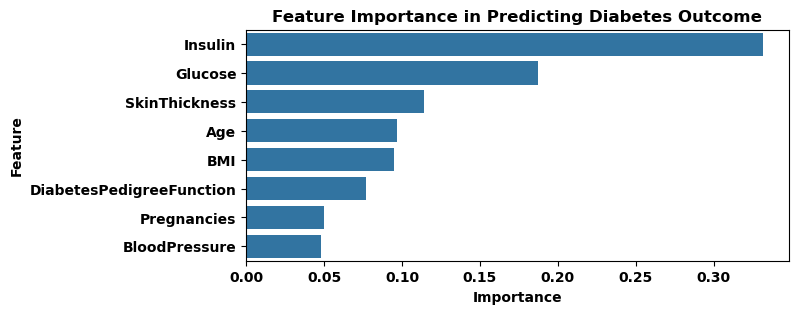

In [32]:
# Plot the feature importance in the random forest
plt.figure(figsize = (7, 3))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df)
plt.title('Feature Importance in Predicting Diabetes Outcome')


In [33]:
# Perform GridSearchCV
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(models[0][1], parameters, cv=10, verbose=0)
rf_cv = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy (train and test) for the model
print('Tuned hyperparameters (best parameters):', rf_cv.best_params_)
print('Train accuracy:', rf_cv.best_score_)
print('Test accuracy:', rf_cv.best_estimator_.score(X_test, y_test))

Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Train accuracy: 0.8843617664851786
Test accuracy: 0.8827586206896552


## Estimate the Risk of Diabetes for a Specific Person
The instructions in the challenge ask me to calculate the risk of diabetes for a person with the following traits: age 54, length 178 cm, weight 96 kg, and Glucose levels of 125 mg/dL. Since the instructions provide only a limited number of traits for that specific person, I enter the rest of the traits as missing values. 

In general, tree models are good at handling missing data so I find it best to make the prediction using the random forest classification models I previously trained.
1. Random Forest Classifier trained on raw data: This model has accuracy of 76%, so it correctly predicts the target variable in 76% of the cases. It predicts that there is 52% probability that the person with the provided traits has diabetes.
2. Random Forest Classifier trained on pre-processed data and enhanced with GridSearchCV: This model has accuracy of 88%, so it correctly predicts the target variable in 88% of the cases. It predicts that there is 68% probability that the person with the provided traits has diabetes.

In [34]:
# Create variables for the known traits of the person
person_age = 54
person_glucose = 125
person_bmi = 96/(1.78)**2

# Create a dataframe with the traits for the person; unknown traits are entered as None
X_person = pd.DataFrame([[None, person_glucose, None, None, None, person_bmi, None, person_age]], columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,None,125,None,None,None,30.299205,None,54


In [35]:
# Find the predicted outcome for the person using the Random Forest Classifier trained on raw data
y_person = rf0.predict(X_person)
print('The predicted outcome for the person with the entered traits is:', y_person)

# Calculate the probability of the predicted outcome
probability = rf0.predict_proba(X_person)[:, 1]
print('The probability of the predicted outcome is:', probability)

The predicted outcome for the person with the entered traits is: [1]
The probability of the predicted outcome is: [0.52]


In [36]:
# Find the predicted outcome for the person using the Random Forest Classifier trained on pre-processed data
y_person = rf_cv.predict(X_person)
print('The predicted outcome for the person with the entered traits is:', y_person)

# Calculate the probability of the predicted outcome
probability = rf_cv.predict_proba(X_person)[:, 1]
print('The probability of the predicted outcome is:', probability)

The predicted outcome for the person with the entered traits is: [1]
The probability of the predicted outcome is: [0.68097882]
